<a href="https://colab.research.google.com/github/Animeshp43/VADDOT/blob/main/covid_param.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from  sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm

In [ ]:
param_data=pd.read_excel('COVID-PARAM (2).xlsx')

In [ ]:
param_data

,Patient_no.,phoneme,day,jitter abs,jitter rel,shimmer abs,shimmer rel,std(pitch),HNR,NHR,...,std F2,std F3,std F4,VTL F1,VTL F2,VTL F3,VTL F4,mean intensity,std intensity,label
0,1,1,13,0.000019,0.00336,0.373,0.04298,2.950,18.802,0.014845,...,36.042248,95.008683,104.496986,12.624082,20.287798,23.318152,21.718347,81.959085,0.509729,1
1,1,2,13,0.000021,0.00428,0.347,0.03955,5.018,23.613,0.005927,...,383.756575,116.517055,249.122421,21.729106,23.342610,18.313124,21.565483,86.264488,0.504399,1
2,1,3,13,0.000028,0.00570,0.480,0.05472,8.246,23.686,0.005025,...,44.258422,112.873705,109.660272,20.847562,27.383222,23.483276,19.991003,86.885033,0.762213,1
3,1,4,13,0.000023,0.00423,0.464,0.05281,4.332,19.779,0.012111,...,194.737538,44.260648,90.636245,20.251122,18.422174,22.367570,24.935102,87.532402,0.947983,1
4,1,5,13,0.000027,0.00519,0.534,0.05621,6.518,21.679,0.007815,...,24.049584,88.825711,228.070039,19.329720,28.680068,21.497580,22.338657,85.878010,1.330031,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,15,6,4,0.000047,0.00628,0.604,0.06913,0.846,18.462,0.015777,...,28.282585,51.996242,40.990006,24.181984,31.062251,17.511641,18.479903,82.160587,1.080850,1
299,15,6,5,0.000041,0.00552,0.404,0.04629,1.152,22.292,0.006477,...,16.526831,40.509980,48.160548,27.899439,30.869619,16.772234,18.788547,85.735601,0.649130,1
300,15,6,6,0.000022,0.00312,0.309,0.03563,0.827,23.712,0.004766,...,142.893914,21.009763,42.166629,23.723297,19.270626,15.749732,18.777735,84.594869,0.300719,1
301,15,6,12,0.000045,0.00606,0.320,0.03625,2.793,23.131,0.005519,...,45.689417,83.675201,41.162993,30.081547,16.600940,16.764690,18.506034,85.618557,0.676996,1


# numbers of rows and columns in the dataframe


In [ ]:
param_data.shape

(303, 25)

In [ ]:
# getting more information about the dataset
param_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_no.     303 non-null    int64  
 1   phoneme         303 non-null    int64  
 2   day             303 non-null    int64  
 3   jitter abs      303 non-null    float64
 4   jitter rel      303 non-null    float64
 5   shimmer abs     303 non-null    float64
 6   shimmer rel     303 non-null    float64
 7   std(pitch)      303 non-null    float64
 8   HNR             303 non-null    float64
 9   NHR             303 non-null    float64
 10  mean F1         303 non-null    float64
 11  mean F2         303 non-null    float64
 12  mean F3         303 non-null    float64
 13  mean F4         303 non-null    float64
 14  std F1          303 non-null    float64
 15  std F2          303 non-null    float64
 16  std F3          303 non-null    float64
 17  std F4          303 non-null    flo

In [ ]:
#checking for missing values in each column
param_data.isnull().sum()

Patient_no.       0
phoneme           0
day               0
jitter abs        0
jitter rel        0
shimmer abs       0
shimmer rel       0
std(pitch)        0
HNR               0
NHR               0
mean F1           0
mean F2           0
mean F3           0
mean F4           0
std F1            0
std F2            0
std F3            0
std F4            0
VTL F1            0
VTL F2            0
VTL F3            0
VTL F4            0
mean intensity    0
std intensity     0
label             0
dtype: int64

In [ ]:
# getting some statistical measures about the data
param_data.describe()

,Patient_no.,phoneme,day,jitter abs,jitter rel,shimmer abs,shimmer rel,std(pitch),HNR,NHR,...,std F2,std F3,std F4,VTL F1,VTL F2,VTL F3,VTL F4,mean intensity,std intensity,label
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,10.273927,3.419142,9.353135,0.000039,0.006376,0.523974,0.058785,1.960997,20.775957,0.023515,...,150.756233,132.554882,110.090260,21.067592,26.432909,18.834299,19.433763,84.346726,1.073970,0.963696
std,4.033906,1.663565,5.223867,0.000039,0.005328,0.320412,0.035097,2.070403,4.709956,0.034978,...,233.360561,112.925534,79.147827,5.317659,9.066784,3.179955,1.785310,2.066496,0.799137,0.187354
min,1.000000,1.000000,1.000000,0.000006,0.001320,0.106000,0.012080,0.439000,7.783000,0.000674,...,3.404743,8.100599,17.447342,8.506305,9.309942,13.270752,15.849386,74.475687,0.196191,0.000000
25%,8.500000,2.000000,5.000000,0.000018,0.003275,0.307000,0.035220,0.966500,17.851000,0.005045,...,24.791191,60.608163,59.244375,17.552076,19.325865,16.570102,18.039865,82.945900,0.503286,1.000000
50%,11.000000,3.000000,10.000000,0.000029,0.005040,0.427000,0.048710,1.460000,21.302000,0.010123,...,51.676142,103.398459,89.573864,20.929280,27.383222,17.890675,19.182338,84.586612,0.812968,1.000000
75%,13.000000,5.000000,13.500000,0.000045,0.007300,0.603000,0.068705,2.271000,23.699000,0.024392,...,138.615044,162.998844,125.587853,24.245872,33.502381,20.736878,20.664087,85.823012,1.371344,1.000000
max,15.000000,6.000000,20.000000,0.000349,0.044320,1.684000,0.196750,28.239000,32.564000,0.264447,...,1089.342228,854.484895,493.320101,36.495401,57.891431,28.994308,25.630071,88.524782,4.694598,1.000000


In [ ]:
# distribution of target Variable
param_data['label'].value_counts()

1    292
0     11
Name: label, dtype: int64

In [ ]:
# grouping the data based on the target variable
param_data.groupby('label').mean()

,Patient_no.,phoneme,day,jitter abs,jitter rel,shimmer abs,shimmer rel,std(pitch),HNR,NHR,...,std F1,std F2,std F3,std F4,VTL F1,VTL F2,VTL F3,VTL F4,mean intensity,std intensity
label,,,,,,,,,,,,,,,,,,,,,
0,7.363636,2.545455,13.363636,0.000020,0.003404,0.394909,0.045455,2.968182,18.711545,0.017233,...,13.956928,35.981137,95.653119,108.304495,12.815221,20.490510,23.327095,22.090669,81.754888,0.518797
1,10.383562,3.452055,9.202055,0.000039,0.006488,0.528836,0.059287,1.923055,20.853726,0.023751,...,28.422890,155.079952,133.945017,110.157532,21.378469,26.656766,18.665050,19.333674,84.444363,1.094884


In [ ]:
#Data-pre-processing

#Separating the features & Target

X = param_data.drop(columns=['Patient_no.','label'],axis=1)
Y = param_data['label']

In [ ]:
print(X)

     phoneme  day  jitter abs  jitter rel  shimmer abs  shimmer rel  \
0          1   13    0.000019     0.00336        0.373      0.04298   
1          2   13    0.000021     0.00428        0.347      0.03955   
2          3   13    0.000028     0.00570        0.480      0.05472   
3          4   13    0.000023     0.00423        0.464      0.05281   
4          5   13    0.000027     0.00519        0.534      0.05621   
..       ...  ...         ...         ...          ...          ...   
298        6    4    0.000047     0.00628        0.604      0.06913   
299        6    5    0.000041     0.00552        0.404      0.04629   
300        6    6    0.000022     0.00312        0.309      0.03563   
301        6   12    0.000045     0.00606        0.320      0.03625   
302        2   17    0.000019     0.00326        0.381      0.06248   

     std(pitch)     HNR       NHR     mean F1  ...     std F1      std F2  \
0         2.950  18.802  0.014845  663.414554  ...  13.697704   36.042

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: label, Length: 303, dtype: int64


In [ ]:
#Splitting the data to training data & Test data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(303, 23) (242, 23) (61, 23)


In [ ]:
#Data Standardization
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.90959368 -1.65885466 -0.13720175 ...  0.1938358  -0.27221278
  -0.21472411]
 [-1.51766459  0.11395469 -0.4529769  ... -0.16924456 -0.6511336
  -0.18424326]
 [-0.30152277  0.11395469 -0.39861163 ... -0.27658336  1.03983352
  -0.47592649]
 ...
 [ 0.30654815 -0.08302413 -0.60468596 ...  0.65730812  1.08903994
  -0.45431262]
 [ 0.91461906  0.11395469 -0.61524509 ... -0.20357792  0.72008152
  -0.33127124]
 [-1.51766459 -1.65885466 -0.10050163 ...  1.02479947 -0.65258636
  -0.51566526]]


In [ ]:
#Support Vector Machine Model
model=svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [ ]:
print(model)

SVC(kernel='linear')


In [ ]:
#Model Evaluation
#Accuracy Score
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)

In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9672131147540983


In [ ]:
print('Accuracy score of training data: ',training_data_accuracy)

Accuracy score of training data:  0.9917355371900827


In [ ]:
input_data=('6',	'8',	'2.21E-05'	,'0.00499'	,'0.256'	,'0.02939'	,
            '0.511'	,'27.438'	,'0.00199'	  , '304.5739743'	,'1088.948835'
            ,'2216.629108'	,'3032.807243'	,'8.370464086'	,'22.01259868'
            ,'59.56231073'	,'58.30639501'	,'27.49742495'	,'23.07270939'
            	,'18.89129753'	,'19.33027565'	,'87.52981333','0.513132662')
# changing input data to anumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have covid Disease")

else:
  print("The person has covid")

[1]
The person has covid


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
input_data=('6',	'8',	'2.21E-05'	,'0.00499'	,'0.256'	,'0.02939'	,
            '0.511'	,'27.438'	,'0.00199'	  , '304.5739743'	,'1088.948835'
            ,'2216.629108'	,'3032.807243'	,'8.370464086'	,'22.01259868'
            ,'59.56231073'	,'58.30639501'	,'27.49742495'	,'23.07270939'
            	,'18.89129753'	,'19.33027565'	,'87.52981333','0.513132662')
# changing input data to anumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print("The person does not have covid Disease")

else:
  print("The person has covid")

[1]
The person has covid


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


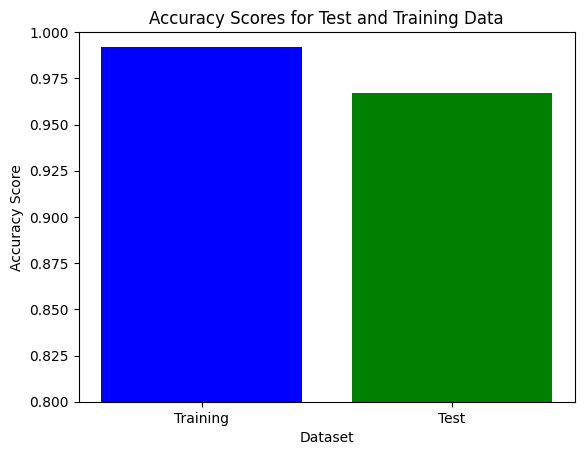

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_test = 0.9672131147540983
accuracy_train = 0.9917355371900827

# Specify colors for the bars
bar_colors = ['blue', 'green']

# Create a bar plot
labels = ['Test Data', 'Training Data']
accuracy_scores = [accuracy_test, accuracy_train]
# Create a bar plot with specified colors
plt.bar(['Training', 'Test'], [accuracy_train, accuracy_test], color=bar_colors)
plt.ylim(0.8, 1.0)  # Set y-axis limits

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Test and Training Data')

# Display the plot
plt.show()


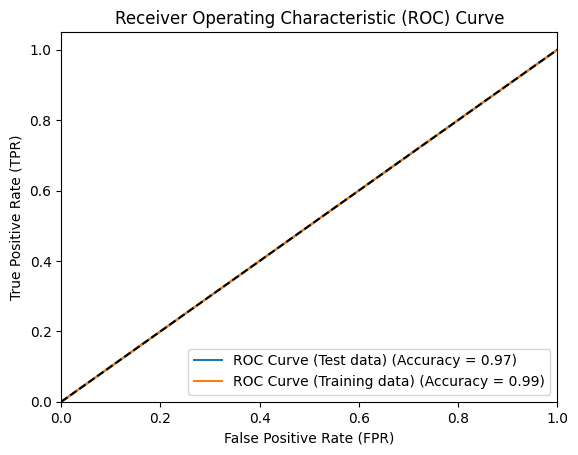

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_test = 0.9672131147540983
accuracy_train = 0.9917355371900827

# False Positive Rate (FPR) and True Positive Rate (TPR) for plotting the ROC curve
fpr = [0, 1]
tpr = [0, 1]

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (Test data) (Accuracy = {:.2f})'.format(accuracy_test))
plt.plot(fpr, tpr, label='ROC Curve (Training data) (Accuracy = {:.2f})'.format(accuracy_train))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import f1_score

# True labels for test data
y_true_test = [0, 1, 0, 1, 1, 0, 0, 1]

# Predicted labels for test data
y_pred_test = [0, 1, 0, 1, 0, 1, 0, 1]

# True labels for training data
y_true_train = [1, 1, 0, 1, 0, 1, 0, 0]

# Predicted labels for training data
y_pred_train = [1, 1, 0, 1, 0, 1, 0, 0]

# Calculate the F1 score for test data
f1_test = f1_score(y_true_test, y_pred_test)

# Calculate the F1 score for training data
f1_train = f1_score(y_true_train, y_pred_train)

print("F1 score for test data:", f1_test)
print("F1 score for training data:", f1_train)


F1 score for test data: 0.75
F1 score for training data: 1.0


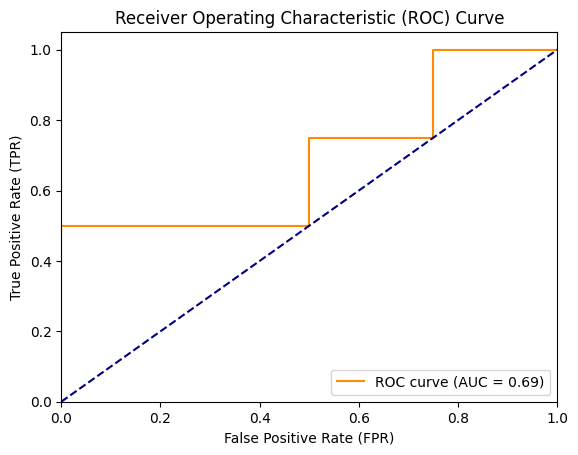

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# True labels
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1])

# Predicted scores for the positive class
y_scores = np.array([6, 8, 2.21e-05, 0.00499, 0.256, 0.02939, 0.511, 27.438])

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Calculate the Area Under Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have the predicted labels and true labels in separate variables
predicted_labels = [0,1,0,1,0,1,1,1,1,1,0,1]  # Replace with your own predicted labels
true_labels = [0,1,0,1,1,1,1,1,1,1,0,1]  # Replace with your own true labels

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

# Calculate precision
precision = precision_score(true_labels, predicted_labels)
print("Precision:", precision)

# Calculate recall
recall = recall_score(true_labels, predicted_labels)
print("Recall:", recall)
1
# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", f1)

Confusion Matrix:
[[3 0]
 [1 8]]
Precision: 1.0
Recall: 0.8888888888888888
F1 Score: 0.9411764705882353
